- Find the most frequent tweeter on this keyword 'Snapchat'
- Finding the most Influential tweet and time Zone analysis of those tweets 

In [1]:
import requests
from requests_oauthlib import OAuth1
from requests.models import Response
from time import sleep
import json
import matplotlib.pyplot as plt
import os
import glob

In [2]:
accesstoken=os.getenv('accesstoken')
accesstokensecret=os.getenv('accesstokensecret')
consumerkey=os.getenv('consumerkey')
consumersecret=os.getenv('consumersecret')
url='https://api.twitter.com/1.1/account/verify_credentials.json'
auth = OAuth1(consumerkey, consumersecret, accesstoken,accesstokensecret)
requests.get(url, auth=auth)

<Response [200]>

In [3]:
path='Final Project/Storing Data/'

- Most Frequent tweeter of this topic


In [4]:
freq_user_id = {}

for filename in glob.glob(os.path.join(path, '*.json')):
    with open(filename) as f:
        data = json.load(f)
        for id in data:
            user = data[id]['user']
            userid=user['id_str']
            if userid is not None: 
                if userid in freq_user_id:
                    freq_user_id[userid] += 1
                else: 
                    freq_user_id[userid] = 1
                    
for key, value in sorted(freq_user_id.items(), key=lambda x: x[1], reverse = True)[:1]:
    print('The most frequent user is',key,'with the most number of tweets on Snapchat:', value)

The most frequent user is 1713036884 with the most number of tweets on Snapchat: 28


- Finding the top Influential tweets based on retweet and followers count and corresponding time zones of the same


The following tweets are the most influential and their value of influence is:
Status ID:  855163379987755008 
 RT @myvotetoday: INDIA is 2nd largest market for @facebook &amp; @Twitter but @Snapchat Founder @evanspiegel says the country is TOO POOR. Unin… 
 Value of Influence: 42318738 
 Time Zone: New Delhi 

Status ID:  855108288001826816 
 RT @myvotetoday: INDIA is 2nd largest market for @facebook &amp; @Twitter but @Snapchat Founder @evanspiegel says the country is TOO POOR. Unin… 
 Value of Influence: 41761848 
 Time Zone: New Delhi 

Status ID:  855089204451311618 
 #TicketsAt12 time! Check our @Snapchat story to find out where our intern is hiding. First to find our intern wins… https://t.co/jA5GeFWf8n 
 Value of Influence: 30678488 
 Time Zone: Central Time (US & Canada) 

Status ID:  854307005665816576 
 RT @FrancoisFillon: Retrouvez mon interview sur @Snapchat dans la section Discover, pour 24 heures seulement ! https://t.co/L6Hz5ZmhaV 
 Value of Influence: 22271652 
 Time Z

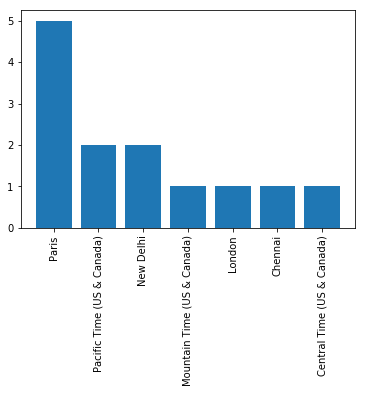

In [10]:
influential_tweets = {}
timezones = {}

for filename in glob.glob(os.path.join(path, '*.json')):
    with open(filename) as f:
        data = json.load(f)
        for key in data:
            if data[key]['retweet_count'] > 0:
                retweets = data[key]['retweet_count']
                followers = data[key]['user']['followers_count']
                influential_tweets[key] = retweets * followers
                
        print("The following tweets are the most influential and their value of influence is:")
        try:
            for key, value in sorted(influential_tweets.items(), key=lambda x: x[1], reverse = True)[:15]:
                print('Status ID: ',key,'\n',data[key]['text'],'\n','Value of Influence:', value, '\n','Time Zone:',data[key]['user']['time_zone'],'\n')
                time_zone=data[key]['user']['time_zone']
                if time_zone is not None:
                    if time_zone in timezones:
                        timezones[time_zone] += 1
                    else:
                        timezones[time_zone] = 1
                    
        except(KeyError):
            continue

print(timezones)

copy = []
for k,v in timezones.items():
    copy.append((v, k))
copy=sorted(copy,reverse=True)

k=[]
v=[]

for x in copy[:10]:
    k.append(x[1])
    v.append(x[0])

plt.bar(range(len(k)), v,align='center')
locs, labels =plt.xticks(range(len(k)), k)
plt.setp(labels, rotation=90)

plt.savefig("Final Project/Analysis/Analysis 1/Images/"+"time_zone.jpg",bbox_inches='tight')
plt.show()     
        